# Udacity Data Scientist Nanodegree - Project 1 Data Science Blog Post

## Analyzing Stack Overflow Survey Data

The project reviewed the Stack Overflow Survey Data 2020. We look through the data and try to visualize the current scenario.

We start with parameters like Country-wise Job Satisfaction. Then, look for the pattern in Education with Compensation level and then we move forward to current technologies/languages in use and the desired technologies/languages people like to work with.

Since we want to analyze the data from people who codes for first two sections, we limit ourselves to the data filled by the develeopers only. 

For the third section, to understand the industries' needs, we analyze the data about current and future trends in languages/technologies, we gather the data from all the respondents across all the countries so that the viewpoint of the people who are non coders but are vital to the industies for example, VP of a company can also be included.

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from PIL.Image import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data from survey results
df=pd.read_csv('survey_results_public.csv')

### SECTION 1: Country wise Job Satisfaction

Question 1 : Which Countries has Highest and Lowest Job Satisfaction?

In [3]:
# Filtering data to get only developer filled surveys
developer_only = df[df['MainBranch'] == 'I am a developer by profession']

# Impurting Jobsatisfaction data with mode
developer_only['JobSat'] = developer_only['JobSat'].fillna(developer_only['JobSat'].mode()[0])

# Categorising and sorting data in Job Satifaction column
developer_only['JobSat'] = pd.Categorical(developer_only['JobSat'], categories=['Very dissatisfied',
                                                                                'Slightly dissatisfied',
                                                                                'Neither satisfied nor dissatisfied',
                                                                                'Slightly satisfied',
                                                                                'Very satisfied'], ordered=True)


In [4]:
#Filter the data to only top 10 countries for the simplification of visualisation
top_10 = list(developer_only['Country'].value_counts().head(10).index)

#Filtering data to get only developer filled surveys
developer_only = developer_only[developer_only['Country'].isin(top_10)]

#Preparing data for Visualisation
previsualised_data = developer_only.groupby(['Country','JobSat'], as_index=False)['Respondent'].count()
#Adding percentage column
total_respondents_per_country = developer_only['Country'].value_counts()

previsualised_data['Respondent Percentage']= previsualised_data \
                                           .apply(lambda x: x['Respondent'] / total_respondents_per_country[x['Country']], axis=1) \
                                           .round(3)

#Pivot the data
previsualised_data = previsualised_data[['Country', 'JobSat', 'Respondent Percentage']]
visualised_data = pd.pivot_table(previsualised_data, values='Respondent Percentage', index='Country', columns='JobSat') \
                 .sort_values('Very satisfied', ascending=False)


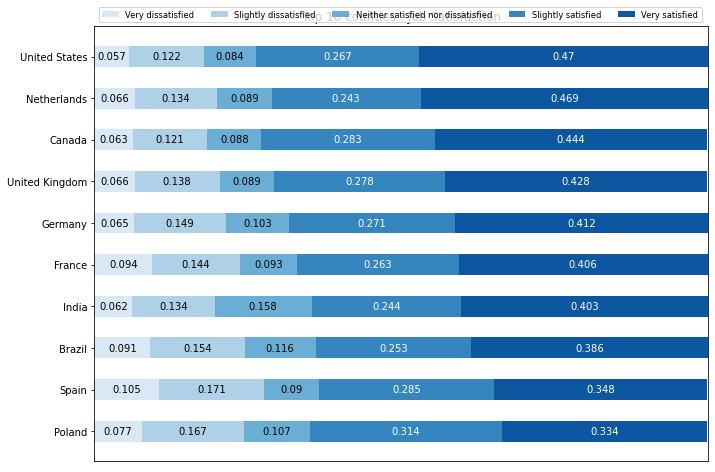

In [5]:
# Visualize the data

category_names=developer_only['JobSat'].sort_values().unique()
labels = list(visualised_data.index)
data = np.array(list(visualised_data.loc[:,:].values))
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('Blues')(
np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(11, 8))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())
plt.title('Top 10 counties : Job Satisfaction')

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,label=colname, color=color)
    xcenters = starts + widths / 2
        
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.1 else 'black'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(float(c)), ha='center', va='center',
                color=text_color)
        ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
                  loc='lower left', fontsize='small')
plt.savefig('1.png')
       

Further breakdown of the above graph into Very Dissatisfied and Very Satisfied Countries for better understanding

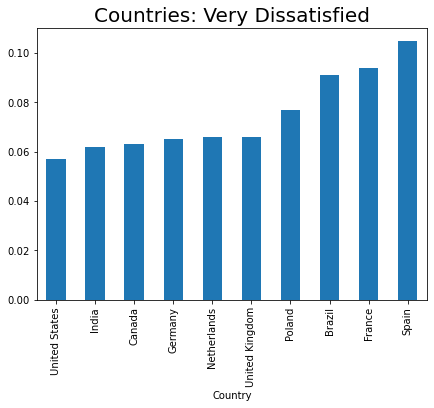

In [6]:
#Visualize the Very Dissatisfied data
plt.figure(figsize=(7, 5))
very_dissatisfied=visualised_data.sort_values(['Very dissatisfied'])
very_dissatisfied['Very dissatisfied'].plot.bar()
plt.title(label= 'Countries: Very Dissatisfied',fontsize=20);
plt.savefig('3.png')


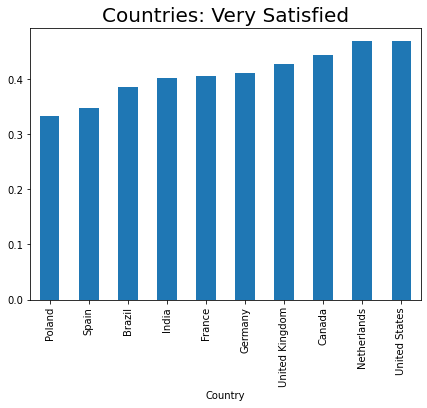

In [7]:
#Visualize the Very Satisfied data
plt.figure(figsize=(7, 5))
very_satisfied=visualised_data.sort_values(['Very satisfied'])
very_satisfied['Very satisfied'].plot.bar()
plt.title(label= 'Countries: Very Satisfied',fontsize=20) ;
plt.savefig('2.png')


### SECTION 2 : Compensation VS Education Level

Question 2: What is the relation between Education Level and Compensation? Is higher education level means higher salary?

In [8]:
#Filtering the data to survey filled by developer only
previsualised_data1 = developer_only.groupby(['EdLevel','ConvertedComp'], as_index=False)['Respondent'].count()

# Add column percentage
total_respondents_per_major = developer_only['EdLevel'].value_counts()

In [9]:
#Defining a new dataframe with Education, Salary Group and number of responsedent for Visualisation
edu_vs_sal=previsualised_data1[['EdLevel','Respondent', 'ConvertedComp']]


In [10]:
#Categorising and sorting the Education level to for Visualisation
edu_vs_sal['EdLevel'] = pd.Categorical(edu_vs_sal['EdLevel'], categories=['I never completed any formal education',
                                                                      'Primary/elementary school',
                                                                      'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
                                                                      'Some college/university study without earning a degree',
                                                                      'Associate degree (A.A., A.S., etc.)',
                                                                      'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                                                                      'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
                                                                      'Professional degree (JD, MD, etc.)',
                                                                      'Other doctoral degree (Ph.D., Ed.D., etc.)',
                                                                     ], ordered=True)

In [11]:
edu_sal=pd.DataFrame(edu_vs_sal.groupby(['EdLevel'])['ConvertedComp'].mean().sort_values())

In [12]:
edu_sal.reset_index(inplace=True)

In [13]:
edu_sal

,EdLevel,ConvertedComp
0,I never completed any formal education,70854.104478
1,"Associate degree (A.A., A.S., etc.)",95101.472637
2,"Secondary school (e.g. American high school, G...",97408.577465
3,"Professional degree (JD, MD, etc.)",98737.582278
4,Some college/university study without earning ...,107484.518648
5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",129204.897052
6,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",134195.038488
7,"Other doctoral degree (Ph.D., Ed.D., etc.)",147099.147368
8,Primary/elementary school,161609.466667


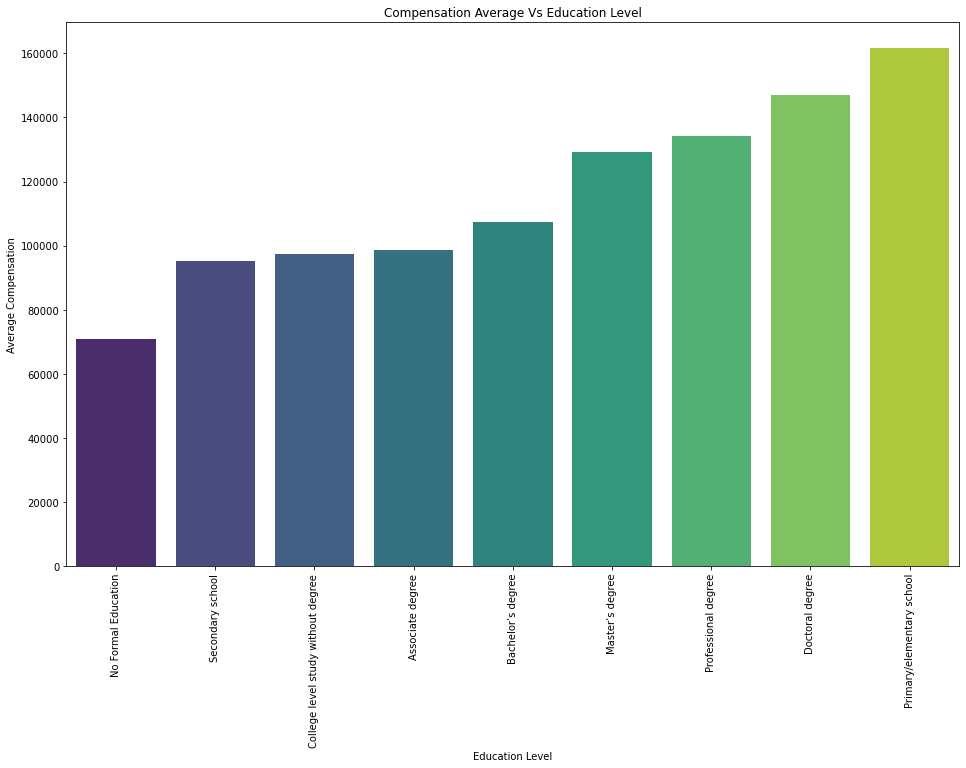

<Figure size 432x288 with 0 Axes>

In [14]:
# Visualize the data
plt.figure(figsize=(16, 10))
xticks=(
                                                                      'No Formal Education',
                                                                      'Secondary school',
                                                                      'College level study without degree',
                                                                      'Associate degree',
                                                                      'Bachelor’s degree',
                                                                      'Master’s degree',
                                                                      'Professional degree',
                                                                      'Doctoral degree',
                                                                      'Primary/elementary school',)

ax=sns.barplot(x='EdLevel', y='ConvertedComp', data=edu_sal, order=edu_sal['EdLevel'] ,palette='viridis')
ax.set(xlabel='Education Level', ylabel="Average Compensation")
ax.set_xticklabels(labels=xticks,rotation=90)
plt.title("Compensation Average Vs Education Level")
plt.show(ax);
plt.savefig('4.png')



### SECTION 3: Current and Future trends in languages/technologies

Question 3: What are the current trends in languages/technologies?

In [15]:
#Preparing Technology Data for Visualisation
def technology_sort(df, parameter):
    df_new=df[parameter].dropna().str.split(';', expand=True )
    c=df_new.loc[:,:].values.ravel()
    import collections
    k=collections.Counter(c)
    df_sort=pd.DataFrame(list(k.items()), columns= ['Technology', 'Users'])
    df_sort=df_sort.sort_values(['Users'], ascending=False)
    df_sort=df_sort.reset_index(drop=True)
    df_sort=df_sort.drop([0])
    return df_sort


In [16]:
#Technology Visualisation Plot
def tech_plot(df, col1,col2, title=''):
    plt.figure(figsize=[16, 10])
    plt.title(title)
    ax=sns.barplot(x=col1, y=col2, data=df,palette='tab20c')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

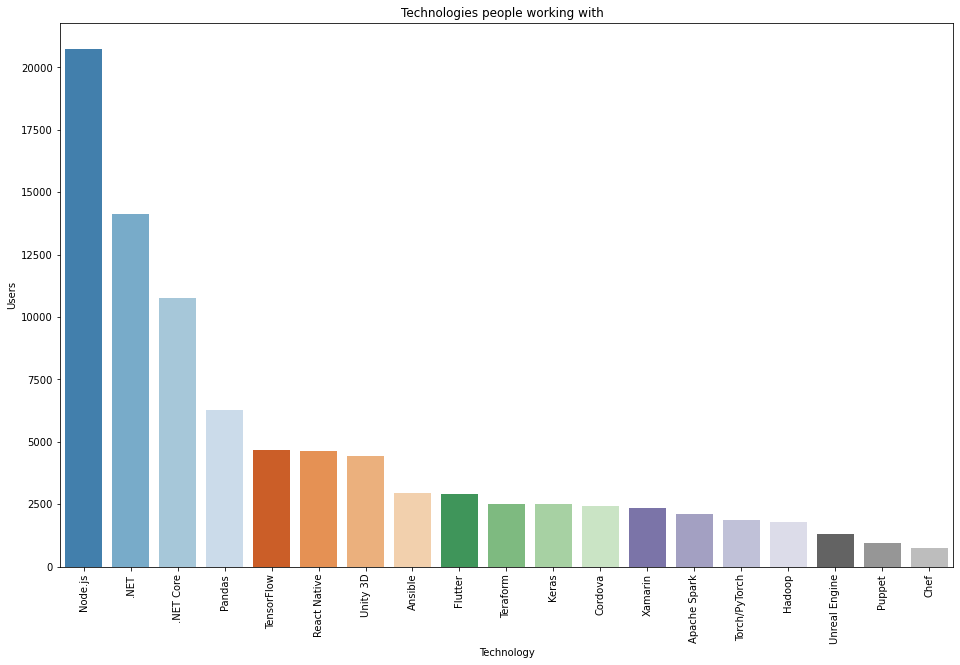

In [17]:
MiscTechWorkedWith=technology_sort(df,'MiscTechWorkedWith')

tech_plot(MiscTechWorkedWith,'Technology', 'Users', 'Technologies people working with  ')
plt.savefig('5.png')


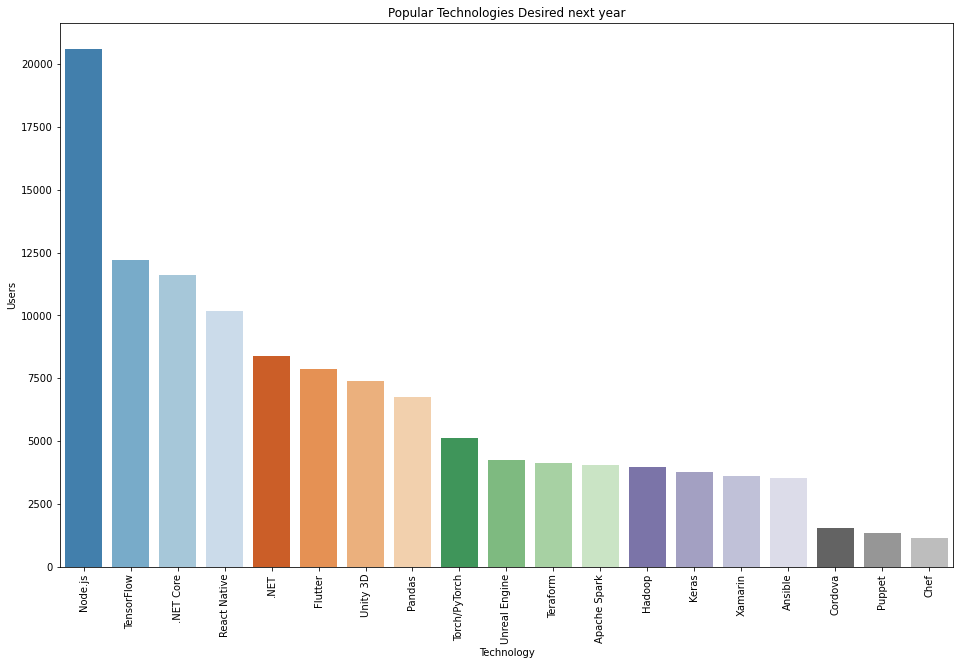

In [18]:
MiscTechDesireNextYear=technology_sort(df,'MiscTechDesireNextYear')
tech_plot(MiscTechDesireNextYear,'Technology', 'Users', 'Popular Technologies Desired next year')
plt.savefig('6.png')


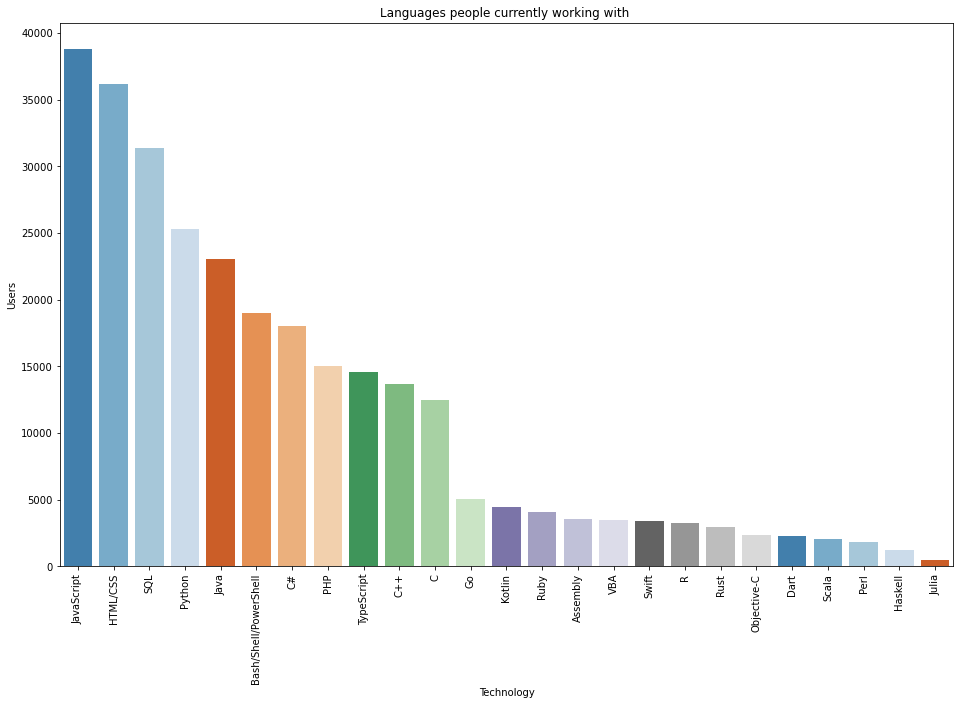

In [19]:
LanguageWorkedWith=technology_sort(df,'LanguageWorkedWith')
tech_plot(LanguageWorkedWith,'Technology', 'Users', 'Languages people currently working with ')
plt.savefig('7.png')


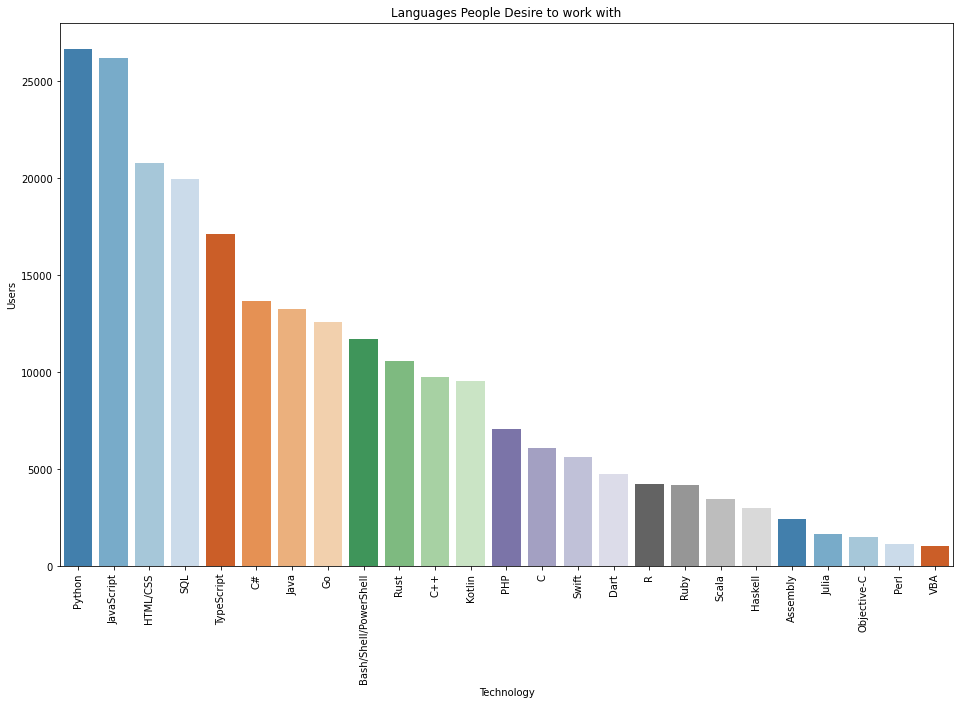

In [20]:
LanguageDesireNextYear=technology_sort(df,'LanguageDesireNextYear')
tech_plot(LanguageDesireNextYear,'Technology', 'Users', 'Languages People Desire to work with')
plt.savefig('8.png')
